## importing libraries

In [2]:
import numpy as np    
import pandas as pd
import os 
import cv2 as cv
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Rescaling,Dropout
from tensorflow.keras.callbacks import EarlyStopping

## converting data into train data from image generator

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/koppa/OneDrive/Desktop/driver dsitraction/imgs/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100, 100),
  batch_size=128,label_mode='categorical',)

Found 22424 files belonging to 10 classes.
Using 17940 files for training.


## converting data into validation data from image generator

In [5]:
val_data = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/koppa/OneDrive/Desktop/driver dsitraction/imgs/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(100, 100),
  batch_size=128,label_mode='categorical',)

Found 22424 files belonging to 10 classes.
Using 4484 files for validation.


In [6]:
# converting data into validation data from image generator
test_data = image_dataset_from_directory(
    'C:/Users/koppa/OneDrive/Desktop/driver dsitraction/imgs/test',
    batch_size = 128,
    image_size=(100,100),
    labels = None,
    label_mode=None,
    shuffle = False
)

Found 79726 files belonging to 1 classes.


## showing some of the images

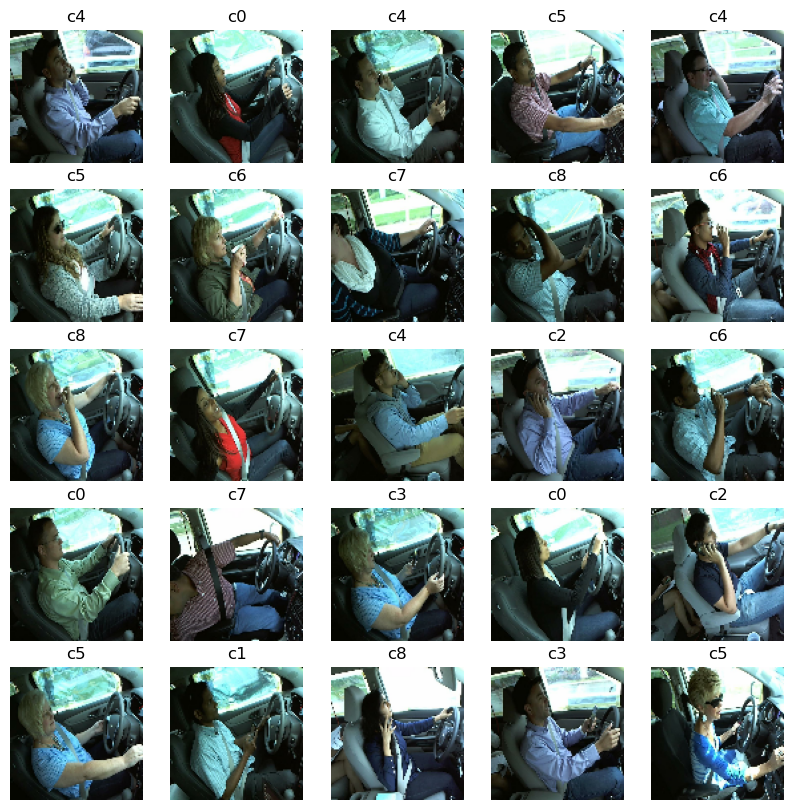

In [7]:
classes = train_data.class_names
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_data.take(1):
    labels = labels.numpy()
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i].argmax()])
        plt.axis("off")

In [16]:
class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

##  creating our model

In [8]:
model = tf.keras.models.Sequential([
    Rescaling(scale = 1/255,input_shape=(100,100,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.1),
    Dense(512,activation='relu'),
    
    Dense(256,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax'),
])

## compiling our model

In [9]:
model.compile(optimizer = Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

## early stopping to stop overfitting

In [10]:
es = EarlyStopping(monitor='val_acc',min_delta=0.01,patience=2)

## fitting the model

In [11]:
history = model.fit(train_data,epochs=10,validation_data=val_data,callbacks=[es])

Epoch 1/10
141/141 [==============================] - 427s 3s/step - loss: 1.0157 - acc: 0.6364 - val_loss: 0.2307 - val_acc: 0.9300
Epoch 2/10
141/141 [==============================] - 305s 2s/step - loss: 0.1426 - acc: 0.9576 - val_loss: 0.0743 - val_acc: 0.9770
Epoch 3/10
141/141 [==============================] - 300s 2s/step - loss: 0.0726 - acc: 0.9777 - val_loss: 0.0516 - val_acc: 0.9848
Epoch 4/10
141/141 [==============================] - 316s 2s/step - loss: 0.0452 - acc: 0.9867 - val_loss: 0.0368 - val_acc: 0.9886
Epoch 5/10
141/141 [==============================] - 472s 3s/step - loss: 0.0300 - acc: 0.9902 - val_loss: 0.0471 - val_acc: 0.9877
Epoch 6/10
141/141 [==============================] - 531s 4s/step - loss: 0.0411 - acc: 0.9879 - val_loss: 0.0403 - val_acc: 0.9884


## visualizing accuracy and losses

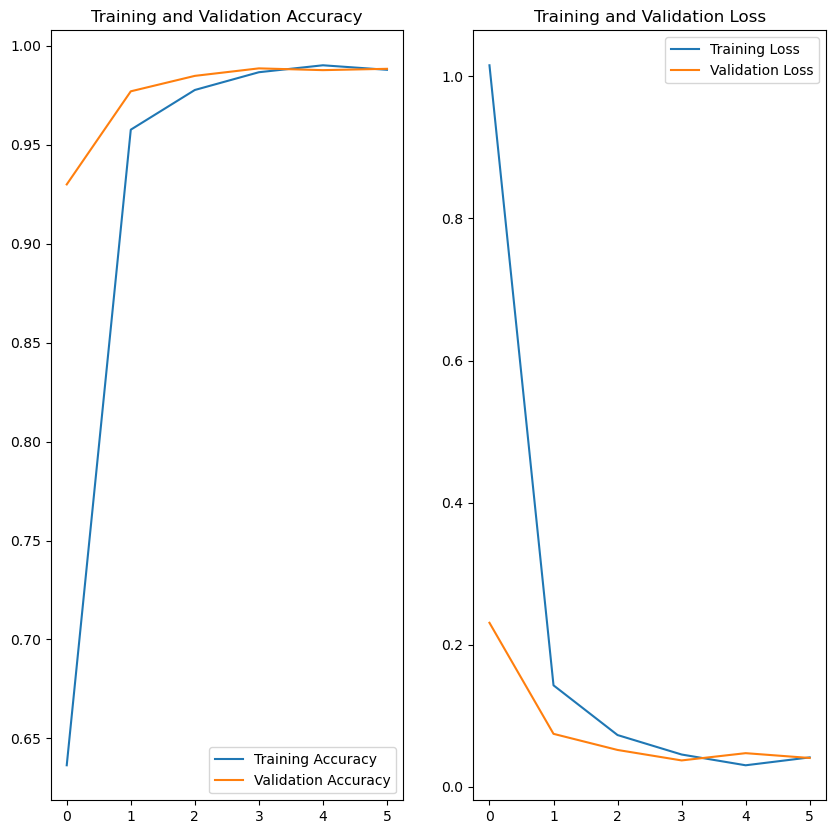

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## function for predicting images

In [13]:
def predict_image(path):
    img = tf.keras.utils.load_img(path).resize((100,100))
    img = np.array(img).reshape((1,100,100,3))
    y = model.predict(img,verbose=False)
    return y

## predicting some test images

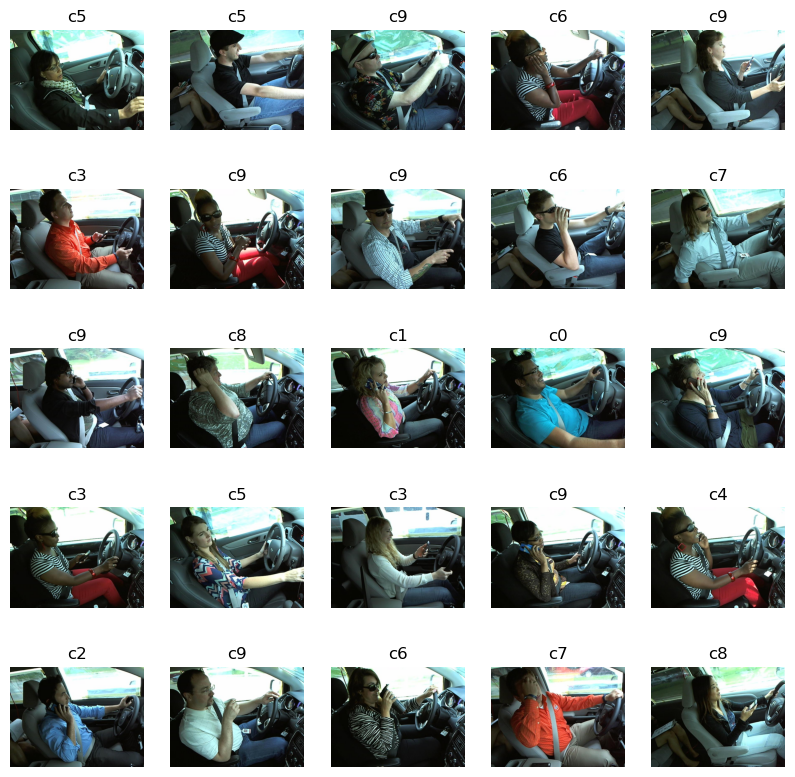

In [14]:
test_path = 'C:/Users/koppa/OneDrive/Desktop/driver dsitraction/imgs/test'
plt.figure(figsize=(10,10))
i=1
for img_path in os.listdir(test_path)[:25]:
    img_path = os.path.join(test_path,img_path)
    img = tf.keras.utils.load_img(img_path)
    ax = plt.subplot(5, 5, i)
    plt.imshow(img)
    plt.title('c'+str(predict_image(img_path).argmax()))
    plt.axis("off")
    i += 1

In [15]:
#predicting test data given
y = model.predict(test_data)

623/623 [==============================] - 822s 1s/step


In [21]:
model.evaluate(val_data)

36/36 [==============================] - 25s 634ms/step - loss: 0.0403 - acc: 0.9884


[0.040286097675561905, 0.9884032011032104]

In [22]:
y.shape

(79726, 10)

In [23]:
import pickle
from pickle import dump
from pickle import load

In [24]:
file_name_pkl='C:/Users/koppa/OneDrive/Desktop/driver dsitraction/driver_distraction_model.pkl'
with open(file_name_pkl,'wb') as file:
    pickle.dump(model,file);

In [25]:
model.save('distracted_driver.h5')